In [2]:
import json
import numpy as np
import pickle
import re
import string
import pandas as pd
import spacy
import re
import string
import functions as f
from glob import glob
from gensim import matutils, models
import scipy.sparse
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import funcy as fp
from gensim import models
from gensim.corpora import Dictionary, MmCorpus
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import _joint_probabilities, _kl_divergence
import seaborn as sns
import matplotlib.patheffects as PathEffects
import umap.umap_ as umap

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load from Pickle

In [2]:
with open('/home/nick/Documents/Reddit_NLP/pickles/worldnews.pickle', 'rb') as file:
    text = pickle.load(file)

#### Clean / Preprocess

In [3]:
clean_text = f.pre_clean(text)

#### Lemmatize / Remove Stop Words

In [4]:
lemmatized = f.lemmatize(clean_text)

['post leave purge',
 'ok context   facebook estimate   million fake user account month   billion message post user s   billion week billion   give shit   million pr intern dig review bot statistic great message hype tank facebook popularity',
 'not take post mars big moon s',
 'facebook fake news problem   facebook news site social medium place anybody express opinion matter accurate mislead   post facebook fact verify actual news source   stop expect social medium site news policing site',
 'lot karen go say hack today',
 'buy mask arrive box warning say not avoid corona virus post pic warning box facebook pull spread misinformation',
 'good tldr   reduce   be bot    facebook inc say tuesday remove   million post second quarter share false information novel coronavirus include content promote fake preventative measure exaggerated cure      big social medium company remove   million post contain hate speech flagship app second quarter   million quarter    delete   million post connect

In [11]:
lemmatized[1]

'ok context   facebook estimate   million fake user account month   billion message post user s   billion week billion   give shit   million pr intern dig review bot statistic great message hype tank facebook popularity'

Words that showed up often in topics... usually not necessary when using preprocessed text, but also includes some words that slip through / words like 'aaaaaaaaaaaaaaaaa'.

In [4]:
stop_list = ['of', 'it', 'to', 'for', 'you', 'the', 'that', 'if', 'my', 'and', 'in', 'from','going', 'too', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaa', 'aaa', 'aaaaaaaaahhhhhhhhhhhh', 'aaaaaaaand', 'aaaaaaaauuuuuugggghhh', 'aaaaaaafternoon', 'aaaaaaand', 'aaaaaand', 'aaaaall', 'aaaaalllllll', 'aaaaand', 'is', 'are', 'what', 'they', 'we', 'about', 'me', 'have', 'im', 'this', 'yeah','will','can','get','be', 'have','be', 'but', 'he', 'she', 'her', 'was', 'with', 'they']

In [6]:
idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aa,aback,abandon,abbreviation,abc,abcipsos,abduct,abduction,aberdeen,aberration,...,такой,хех,чего,штатах,中国电影产业促进法,五毛党,关eu什么事啊,未成年人,本当か,ﬁltration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-Means

In [39]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [40]:
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(idf_df)

In [41]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: people good country think time',
 'Cluster 1: mask wear not people face',
 'Cluster 2: go people not thing like',
 'Cluster 3: not people know think country',
 'Cluster 4: fuck not people shit world',
 'Cluster 5: year death die people not',
 'Cluster 6: russia not vaccine china missile',
 'Cluster 7: war nuclear missile cold nuke',
 'Cluster 8: like not people look sound',
 'Cluster 9: case day new nz zealand']

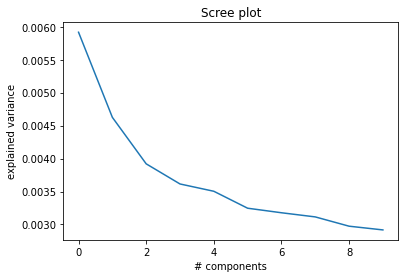

In [42]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

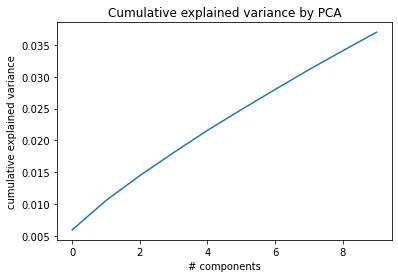

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA');

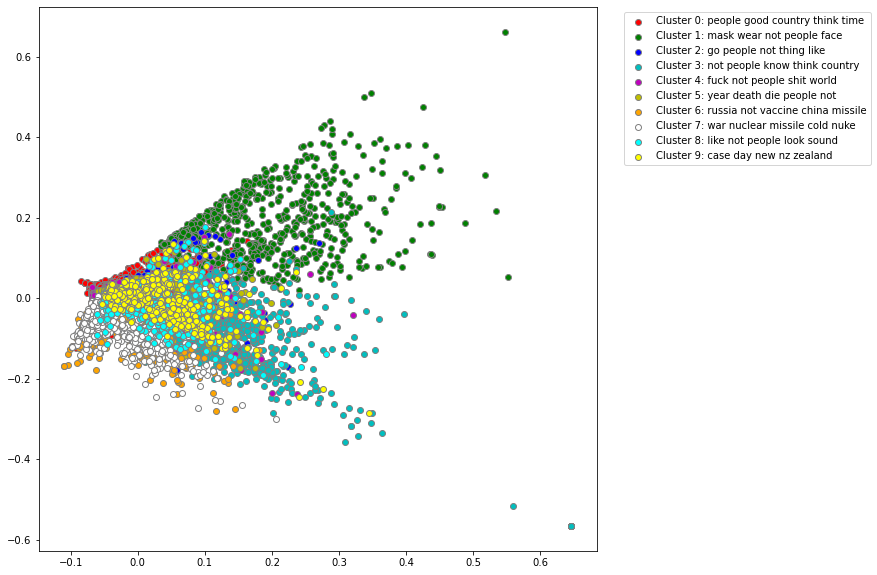

In [44]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [47]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(15265, 2)

Text(0.5, 1.0, 'UMAP+PCA projection of r/Worldnews')

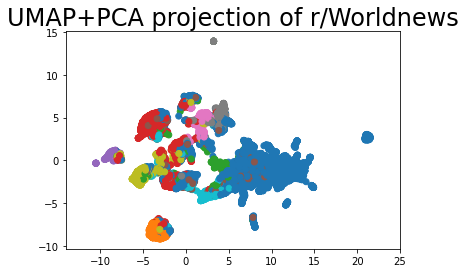

In [48]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP+PCA projection of r/Worldnews', fontsize=24)

There are some nicely defined clusters!

Text(0.5, 1.0, 'UMAP projection of r/Worldnews')

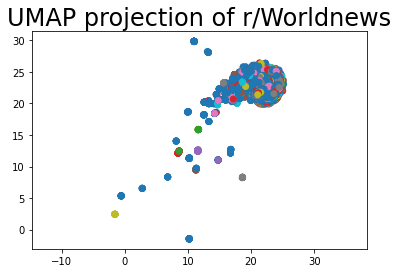

In [46]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/Worldnews', fontsize=24)

### Again with r/politics

In [5]:
with open('/home/nick/Documents/Reddit_NLP/pickles/politics.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aa,aaaand,aaaandonto,aaaannnndddd,aaand,aah,aap,aaron,aarp,ab,...,𝘀𝘂𝗯𝗷𝗲𝗰𝘁,𝘀𝘂𝗺𝗺𝗲𝗿,𝘁𝗵𝗮𝘁,𝘁𝗵𝗲,𝘁𝗵𝗶𝘀,𝘁𝗼,𝘁𝗼𝗼𝗸,𝘂𝘀𝗲𝗱,𝘄𝗮𝘀,𝘆𝗲𝗮𝗿𝘀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [7]:
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: right not wing people think',
 'Cluster 1: like not sound look feel',
 'Cluster 2: biden trump not harris vote',
 'Cluster 3: good know not think thing',
 'Cluster 4: go think fuck time say',
 'Cluster 5: people not think black like',
 'Cluster 6: vote not mail trump people',
 'Cluster 7: not think care want go',
 'Cluster 8: question legal raise outlet subreddit',
 'Cluster 9: trump not election win go']

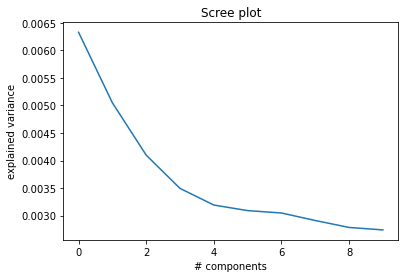

In [8]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

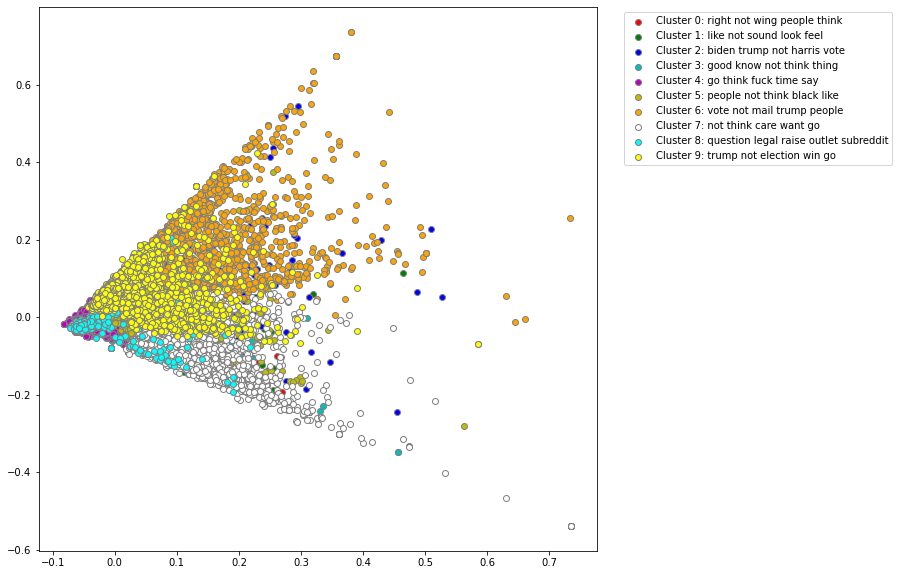

In [9]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [10]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(38821, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/politics')

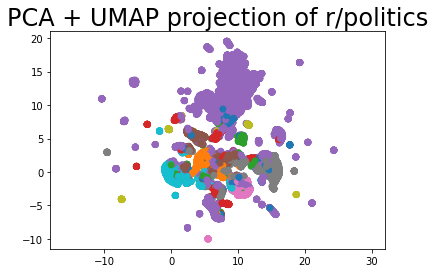

In [11]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/politics', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/politics')

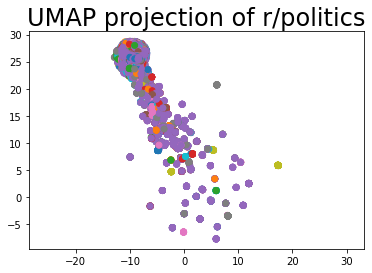

In [12]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/politics', fontsize=24)

### Again with r/memes

In [13]:
with open('/home/nick/Documents/Reddit_NLP/pickles/memes.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaah,aaaw,aayyy,ababababba,abandon,abe,abhidhamma,ability,...,𝐿ℴ𝒂𝐟,𝓜𝓪𝓭𝓮,𝓱𝓸𝓵𝔂,𝔀𝓪𝓽𝓮𝓻,𝔀𝓲𝓽𝓱,𝕎𝕠𝕨,𝖆𝖓𝖈𝖎𝖊𝖓𝖙,𝖎𝖘,𝚃𝚑𝚒𝚜,𝚝𝚎𝚖𝚙𝚕𝚊𝚝𝚎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: flair good think go ok',
 'Cluster 1: yes actually fortunately mmm white',
 'Cluster 2: fuck shit woman not go',
 'Cluster 3: lol not true imagine upvote',
 'Cluster 4: like look not people think',
 'Cluster 5: know not location want like',
 'Cluster 6: old game year remember good',
 'Cluster 7: not go lie half think',
 'Cluster 8: octopus eat alive not live',
 'Cluster 9: fucking deserve cream not pull']

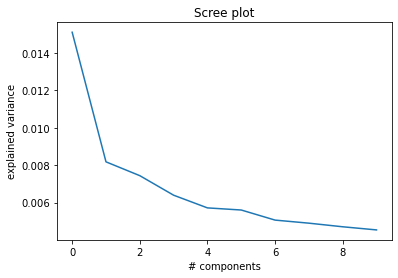

In [16]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

It looks like the "elbow" is at 2 components.. let's try again with that

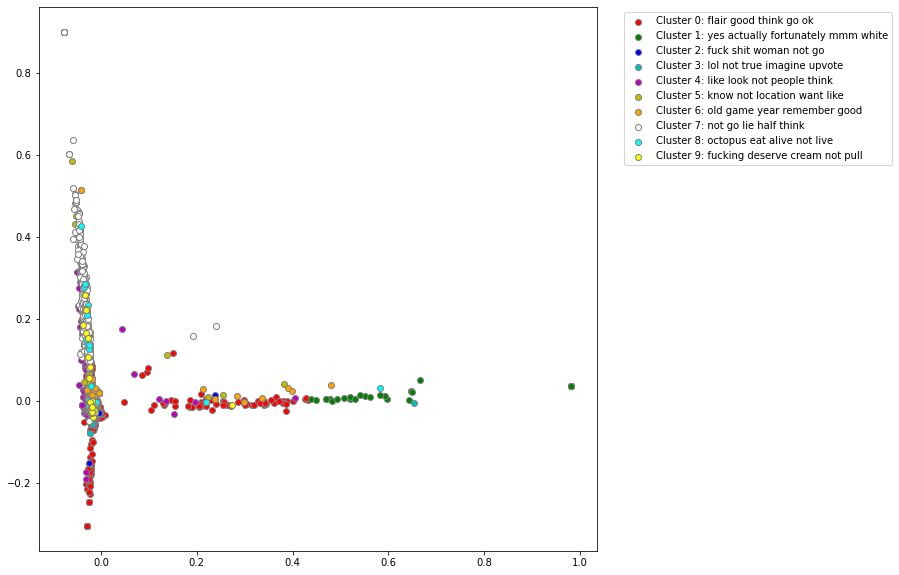

In [17]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [18]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(7332, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/memes')

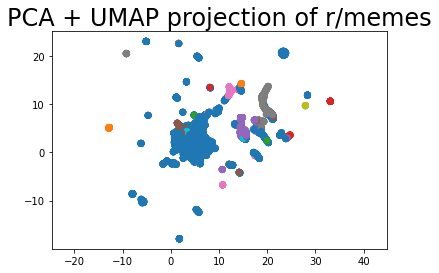

In [20]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/memes', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/memes')

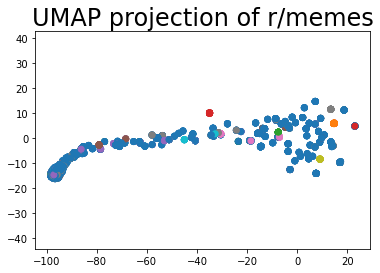

In [21]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/memes', fontsize=24)

Final try, this time using n=2 components (even though the "elbow" is at 1, I still want to have 2 dimensions to visualize)

In [22]:
number_of_clusters=2
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
pca = PCA(n_components=2)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: not like think good go',
 'Cluster 1: yes actually old poses fortunately']

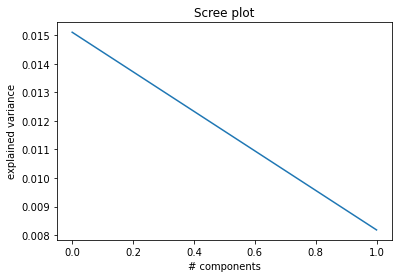

In [24]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

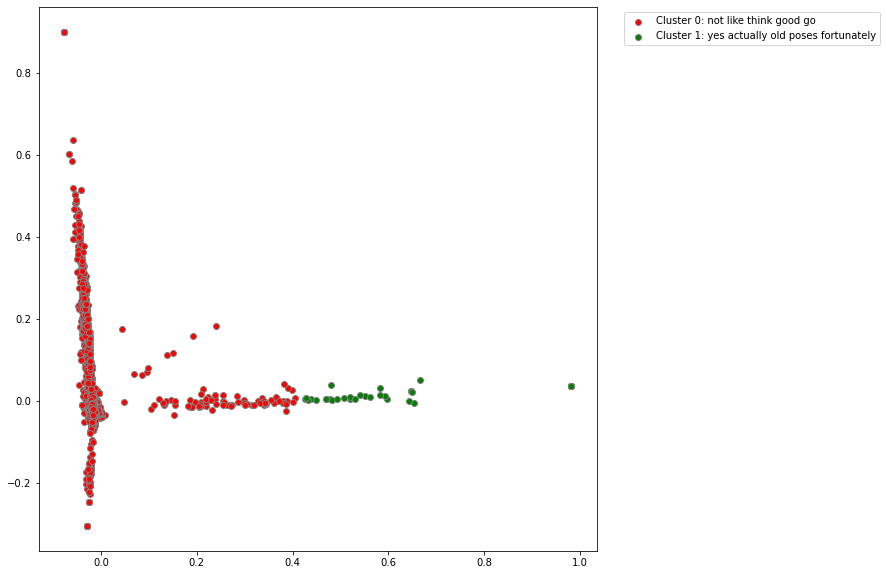

In [25]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [26]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(7332, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/memes')

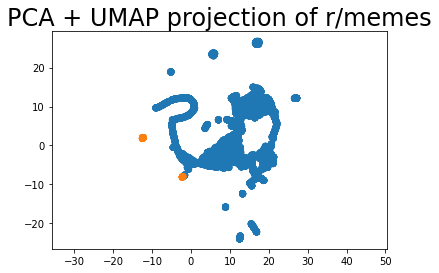

In [27]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/memes', fontsize=24)

Almost looks like a question mark. Sums up my thoughts about which results to go with

Text(0.5, 1.0, 'UMAP projection of r/memes')

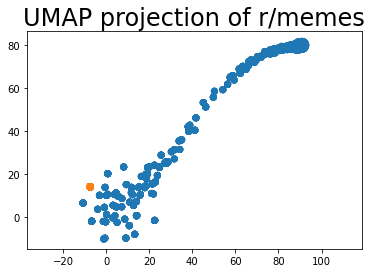

In [28]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/memes', fontsize=24)

Now with r/science

In [29]:
with open('/home/nick/Documents/Reddit_NLP/pickles/science.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aa,aaaaayyyyy,aaaage,aaaammmm,aaaand,aaaannnd,aaaannnndddd,aaah,aaannnnddd,aaas,...,重要的是最终的切实成果,错误的先入为主的观念和普遍的误解使情况变得更糟,阴谋,阿片类药物流行已经令人恐惧,除成本高昂外,饮用水reddit,ﬁrst,ｓａｓｑｕａｔｃｈｓ,ﾟヮﾟ,𓀐𓂸
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [31]:
pca = PCA(n_components=10)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: year good thank study know',
 'Cluster 1: mask wear not people filter',
 'Cluster 2: people not know lot work',
 'Cluster 3: think not people like know',
 'Cluster 4: yes ah not point know',
 'Cluster 5: not know need mean want',
 'Cluster 6: like sound not feel look',
 'Cluster 7: time not long work people',
 'Cluster 8: agree not people know thing',
 'Cluster 9: mean right true use water']

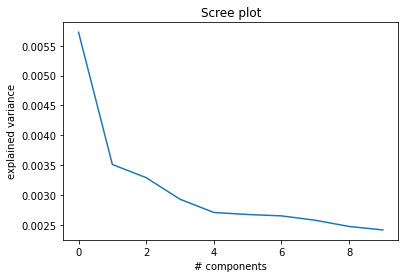

In [32]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

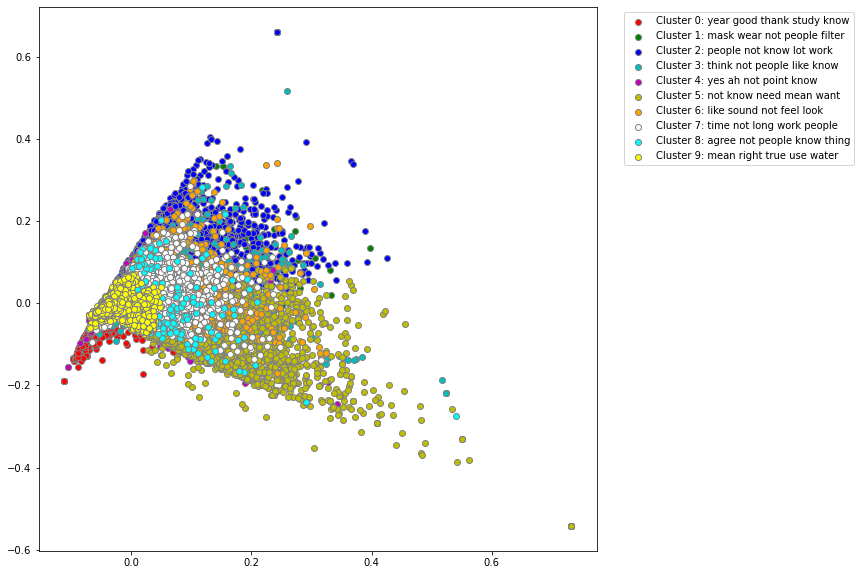

In [33]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [38]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(59966, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/science')

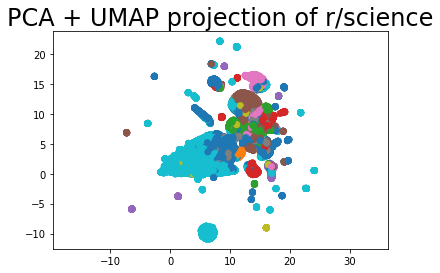

In [39]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/science', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/science')

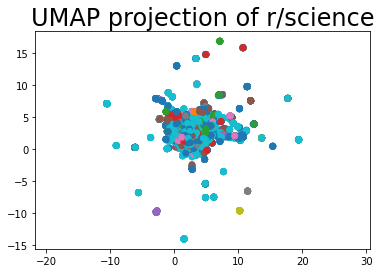

In [40]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/science', fontsize=24)

And with cscareerquestions

In [41]:
with open('/home/nick/Documents/Reddit_NLP/pickles/cscareerquestions.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aaaah,aaaakchyually,aapl,aappendb,aarp,aas,ab,aback,abandon,abbreviate,...,если,конецесли,конецфункции,наклиенте,процентнаценки,рассчитатьпроцентнаценкиценазакупки,тогда,функция,ценазакупки,ценапродажи
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
number_of_clusters=7
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [43]:
pca = PCA(n_components=7)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: job not apply find like',
 'Cluster 1: interview leetcode question not company',
 'Cluster 2: year good like yes think',
 'Cluster 3: thank ill advice look good',
 'Cluster 4: not know like think people',
 'Cluster 5: work hour not time like',
 'Cluster 6: company not work hire like']

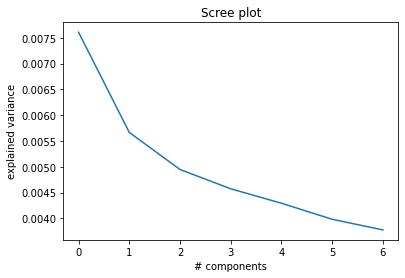

In [44]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

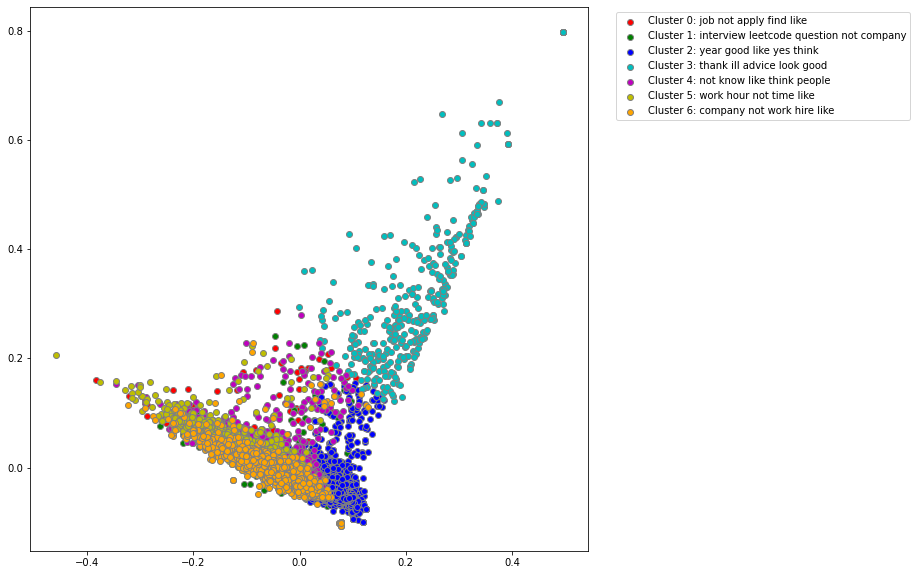

In [45]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [46]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(12703, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/cscareerquestions')

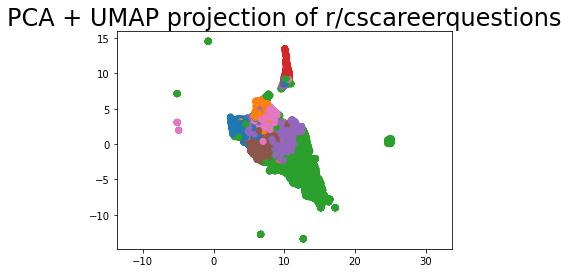

In [48]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/cscareerquestions', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/cscareerquestions')

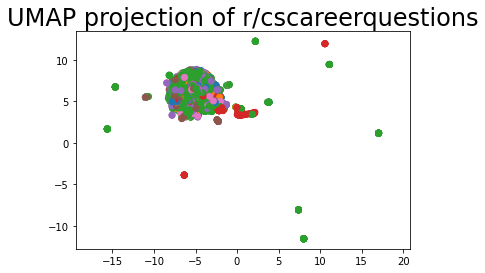

In [49]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/cscareerquestions', fontsize=24)

r/AMA

In [50]:
with open('/home/nick/Documents/Reddit_NLP/pickles/ama.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aaahhh,aas,aave,aaww,abandon,abcdefghijklmnopqrstuvwxyz,abduct,abilie,ability,able,...,yuck,yum,yup,zadra,zakulon,zone,zoo,zookeeper,zoom,zoompleaños
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [75]:
pca = PCA(n_components=3)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: thank glad appreciate read reading',
 'Cluster 1: not like love good know',
 'Cluster 2: poem iconhelp comment story httpswwwredditcomrwritingpromptswikiofftopic']

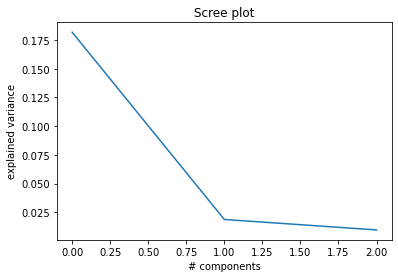

In [76]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

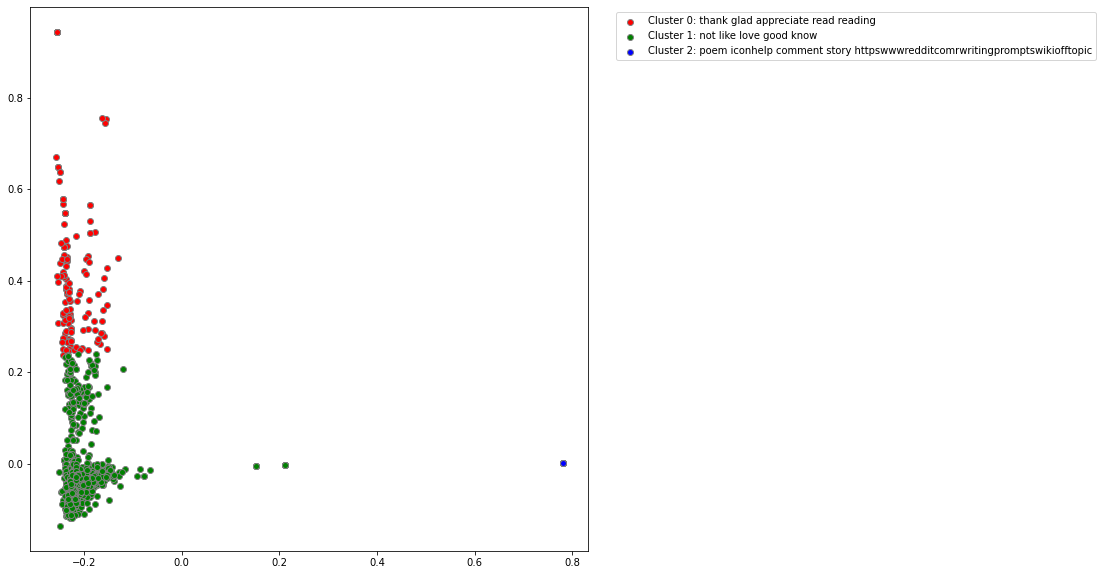

In [77]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [78]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(4026, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/ama')

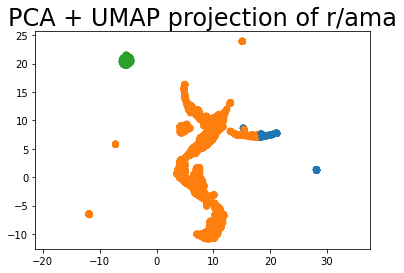

In [80]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/ama', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/ama')

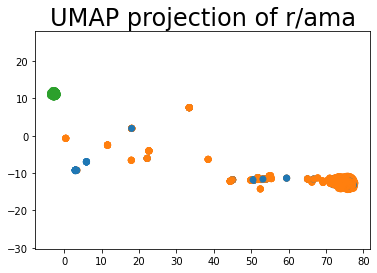

In [81]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/ama', fontsize=24)

r/dankmemes

In [82]:
with open('/home/nick/Documents/Reddit_NLP/pickles/dankmemes.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,abandon,abbreviation,ability,able,abolish,abort,abortion,absolute,absolutely,absurdity,...,ǝʇoʌuʍop,ǝʞɐ,ǝʞɐʇ,ɥɐǝʎ,ɯi,ʇunɔ,ʎɯ,ʞɔnⅎ,ˈtentəkəl,ヽд
0,0.0,0.0,0.0,0.068517,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4073,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4075,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [84]:
pca = PCA(n_components=4)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: meme like catjam yes create',
 'Cluster 1: profile investor dn balance investment',
 'Cluster 2: invest dn upvote return investment',
 'Cluster 3: not like know people say']

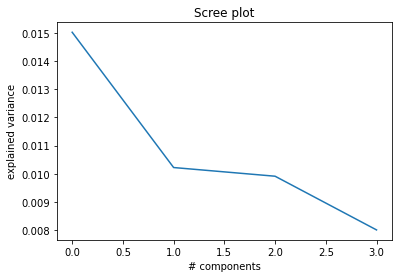

In [61]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

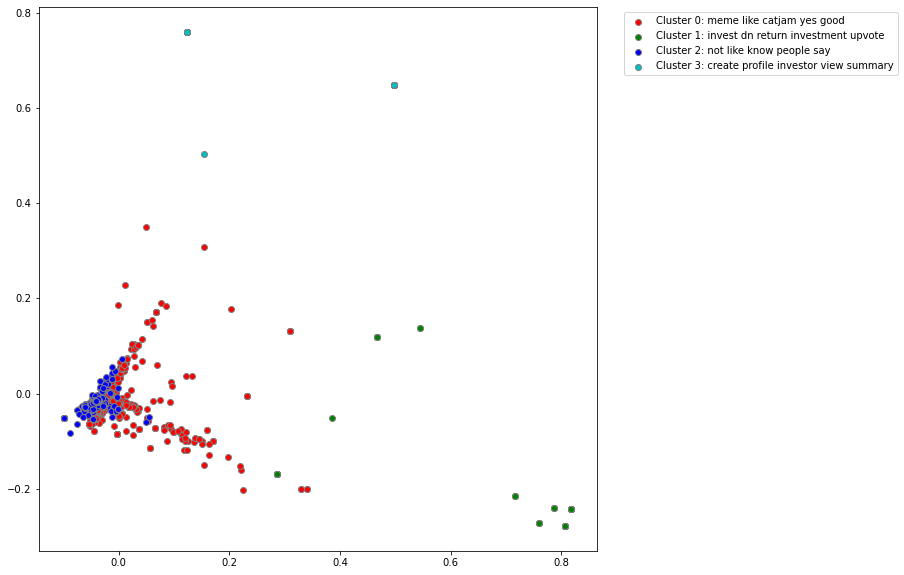

In [62]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [63]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

(4077, 2)

Text(0.5, 1.0, 'PCA + UMAP projection of r/dankmemes')

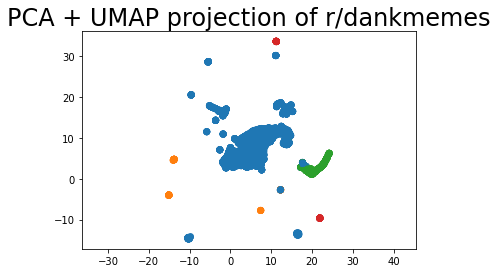

In [64]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/dankmemes', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of r/dankmemes')

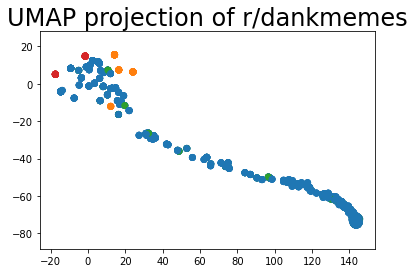

In [65]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/dankmemes', fontsize=24)

Writing prompts

In [66]:
with open('/home/nick/Documents/Reddit_NLP/pickles/writingprompts.pickle', 'rb') as file:
    text = pickle.load(file)
    
clean_text = f.pre_clean(text)
lemmatized = f.lemmatize(clean_text)

idf_df = f.vectorize(lemmatized, stop_words=stop_list)
idf_df

,aaaaaaaaahhhhh,aaaaah,aaaand,aaah,aaand,aaauuuuuuuuuggggggghhhhhhh,aah,aam,aand,aare,...,ᴡɪᴢᴀʀᴅs,ᴡʜɪᴄʜ,ᴡʜᴀᴛ,ᴡʜᴇʀᴇ,ᴡʜᴏ,ᴡʜᴏsᴇ,ᴡᴀɴᴛ,ᴡᴇʀᴇᴡᴏʟᴠᴇs,ᴡᴏʀʟᴅ,ᴡᴏʀʟᴅs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

kmeans = km.fit(idf_df)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [68]:
pca = PCA(n_components=4)
pcafeatures_train = pca.fit_transform(idf_df)
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = idf_df.columns
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: not know say look like',
 'Cluster 1: poem iconhelp comment story httpswwwredditcomrwritingpromptswikiofftopic',
 'Cluster 2: thank glad appreciate read reading',
 'Cluster 3: love like good read write']

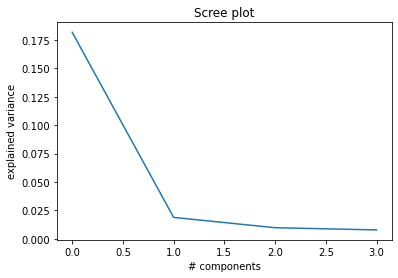

In [69]:
y = km.labels_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot');

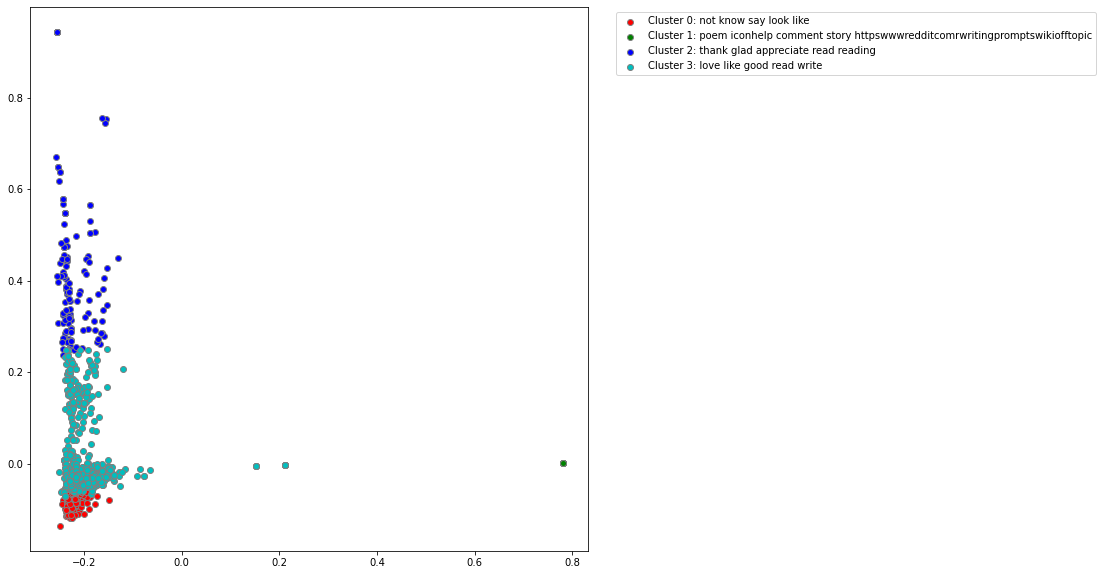

In [70]:
f.plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(pcafeatures_train)
embedding.shape

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA + UMAP projection of r/writingprompts', fontsize=24)

ValueError: 'c' argument has 4026 elements, which is inconsistent with 'x' and 'y' with size 4077.

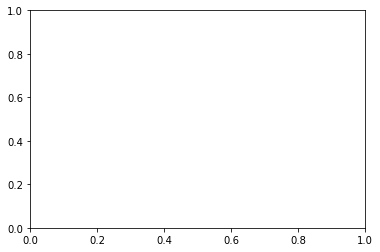

In [86]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(idf_df)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of r/writingprompts', fontsize=24)